## Predicting No of Bike Rentals per Hour in Washington D.c. ##

** The Dataset is available for download on  [University of California, Irvine's website](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset) **

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline


In [132]:
bike_rentals = pd.read_csv('bike_rental_hour.csv')
bike_rentals.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

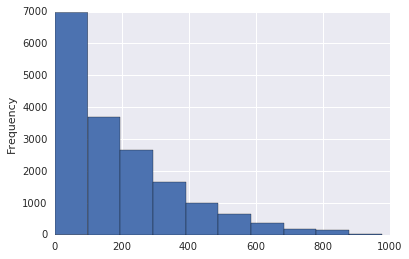

In [133]:
bike_rentals['cnt'].plot(kind = 'hist')

In [134]:
bike_rentals['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

In [135]:
corr_bike = bike_rentals.corr()

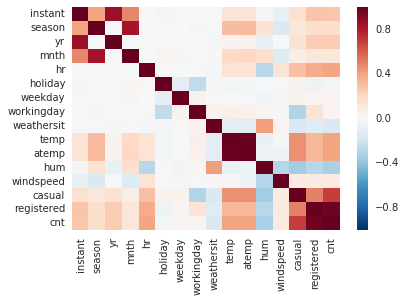

In [136]:
sns.heatmap(corr_bike)

In [137]:
corr_bike['cnt'].sort_values()

hum          -0.322911
weathersit   -0.142426
holiday      -0.030927
weekday       0.026900
workingday    0.030284
windspeed     0.093234
mnth          0.120638
season        0.178056
yr            0.250495
instant       0.278379
hr            0.394071
atemp         0.400929
temp          0.404772
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

There is an extremely strong positive correlation between "cnt"
and "Registered" @ 0.97 and between 'cnt' and 'Casual' variable
@ 0.694.This variables are likely directly co related to 
Bike rentals. We should investigate further to estabilish
mutlicollinearity.

In [138]:
def assign_label(num):
    day = 0
    if (num >=  6) & (num < 12):
        day = 1
    if (num >=  12) & (num < 18):
        day = 2
    if (num >= 18) & (num <= 24):
        day = 3
    if (num >= 0) & (num < 6):
        day = 4
    return day

In [139]:
bike_rentals['time_label']=bike_rentals['hr'].apply(assign_label)

In [140]:
bike_rentals['time_label'].value_counts()

2    4375
3    4368
1    4360
4    4276
Name: time_label, dtype: int64

I will use Mean Square Error metric for measuring the error
as it fits for the kind of data in the 'Cnt' column which a 
a discrete continous value

In [141]:
train = bike_rentals.sample(frac=0.8, random_state = 1)

In [142]:
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [151]:
columns_to_drop = ['casual','dteday','registered','temp','instant','cnt']

In [144]:
predictors = bike_rentals.columns.drop(columns_to_drop)
target = 'cnt'

In [152]:
lr = LinearRegression()
lr.fit(train[predictors], train[target])
prediction = lr.predict(test[predictors])
mse = mean_squared_error(test[target], prediction)
rmse =np.sqrt(mse)
print(mse)
print(rmse)

17052.124871247568
130.5837848710458


The Root Mean Squared Error is 130.606, we will check if this 
can be improved on by tweaking our model

In [146]:
dtr = DecisionTreeRegressor(min_samples_leaf=9,max_depth=80)
dtr.fit(train[predictors], train[target])
decision = dtr.predict(test[predictors])
dtr_mse = mean_squared_error(test[target],decision)
dtr_rmse = np.sqrt(dtr_mse)
print(dtr_rmse)

51.80554987389489


The Decision Tree Model returned a RMSE of 60 at decision 
setting of min_sample_leaf at 1, after some tweaks the
min_sample-leaf at 9 gave a lower RMSE of 53.212
Overall, the DecisionTreeModel performed far better than the Linear Regression model. The Decision Tree Models takes into account Non Linear Independent variables which helps improve the model.

In [147]:
rfr =  RandomForestRegressor(max_depth= 20, min_samples_leaf=3)
rfr.fit(train[predictors],train[target])
forest = rfr.predict(test[predictors])
rfr_mse = mean_squared_error(test[target], forest)
rfr_rmse = np.sqrt(rfr_mse)

print(rfr_rmse)

45.19657187851262


The RandomForest Model performed better than
the DecisionTreeModel, Tweaking some of the parameters
further improved the performance.The Random ForestModel uses Bagging and Parameter tweaking to overcome Overfitting issues common with Decision trees.